<a href="https://colab.research.google.com/github/anuj0456/courses/blob/master/fastai/fastai_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install fastai==2.2.5

     |████████████████████████████████| 194kB 7.6MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
import fastai
print(fastai.__version__)

2.2.5


In [3]:
n = 100

In [12]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.9241,  1.0000],
        [-0.2308,  1.0000],
        [ 0.0546,  1.0000],
        [ 0.4499,  1.0000],
        [ 0.9822,  1.0000]])

In [13]:
a = tensor([3.,2]); a

tensor([3., 2.])

In [14]:
y = x@a + 0.25*torch.randn(n)

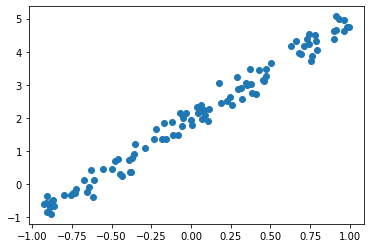

In [15]:
plt.scatter(x[:,0],y)

In [16]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [17]:
a = tensor(-1.,1)

In [18]:
y_hat = x@a
mse(y_hat,y)

tensor(6.4279)

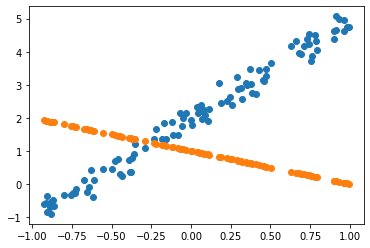

In [19]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [20]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [22]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if t%10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [24]:
lr = 1e-1
for t in range(100): update()

tensor(6.4279, grad_fn=<MeanBackward0>)
tensor(1.3791, grad_fn=<MeanBackward0>)
tensor(0.3984, grad_fn=<MeanBackward0>)
tensor(0.1458, grad_fn=<MeanBackward0>)
tensor(0.0797, grad_fn=<MeanBackward0>)
tensor(0.0625, grad_fn=<MeanBackward0>)
tensor(0.0579, grad_fn=<MeanBackward0>)
tensor(0.0568, grad_fn=<MeanBackward0>)
tensor(0.0565, grad_fn=<MeanBackward0>)
tensor(0.0564, grad_fn=<MeanBackward0>)


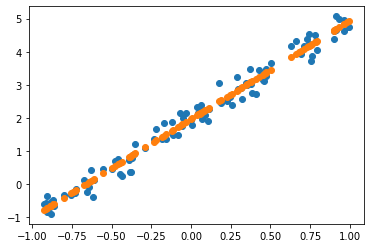

In [25]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach())

In [26]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [29]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.detach())
  return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)